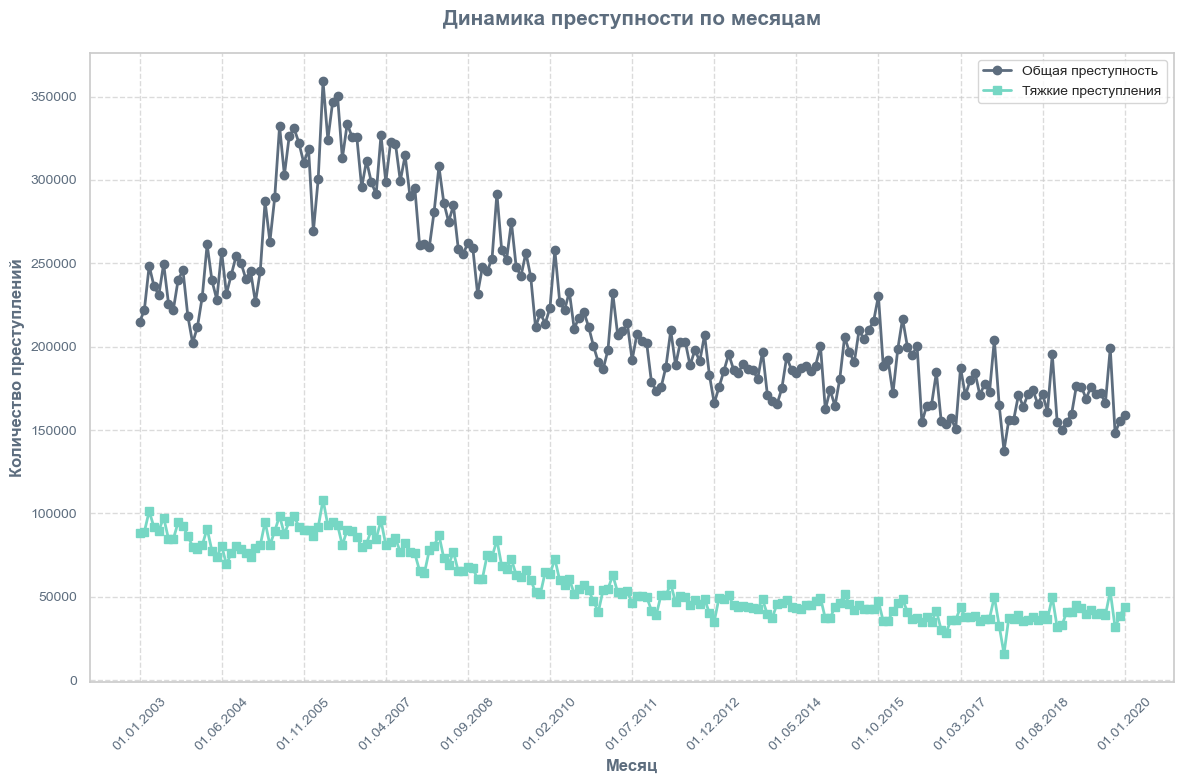

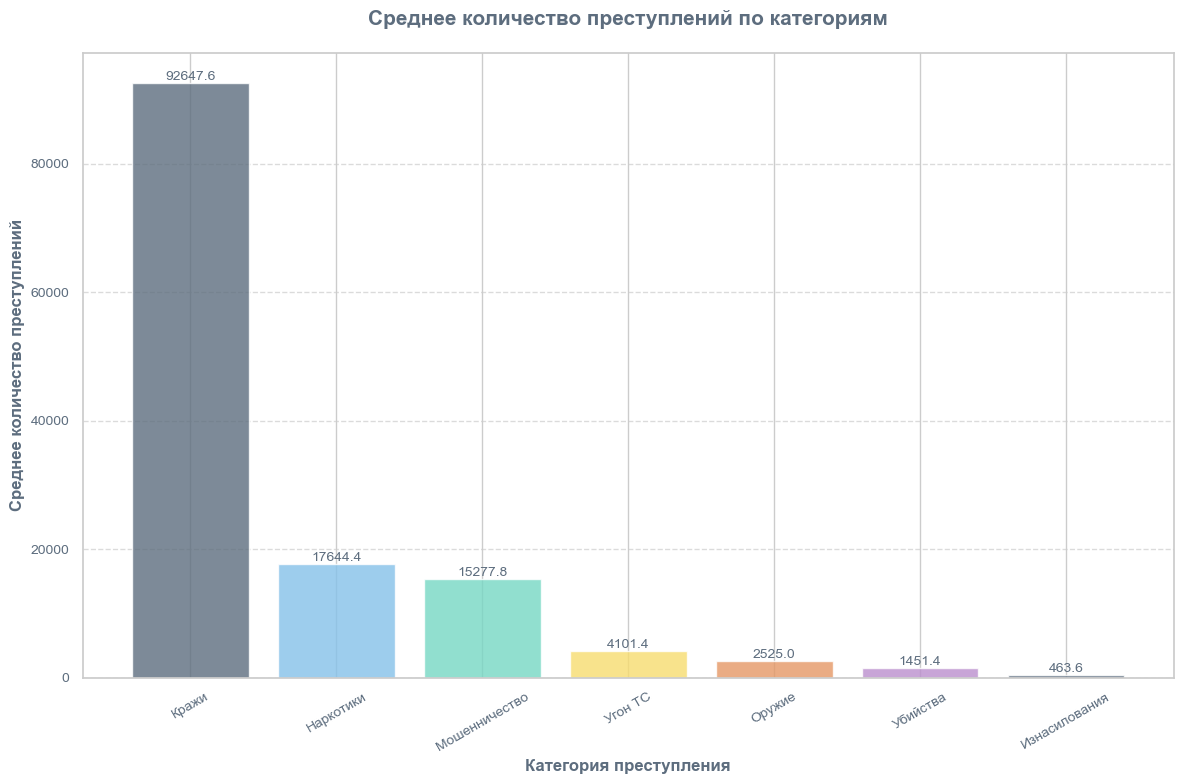

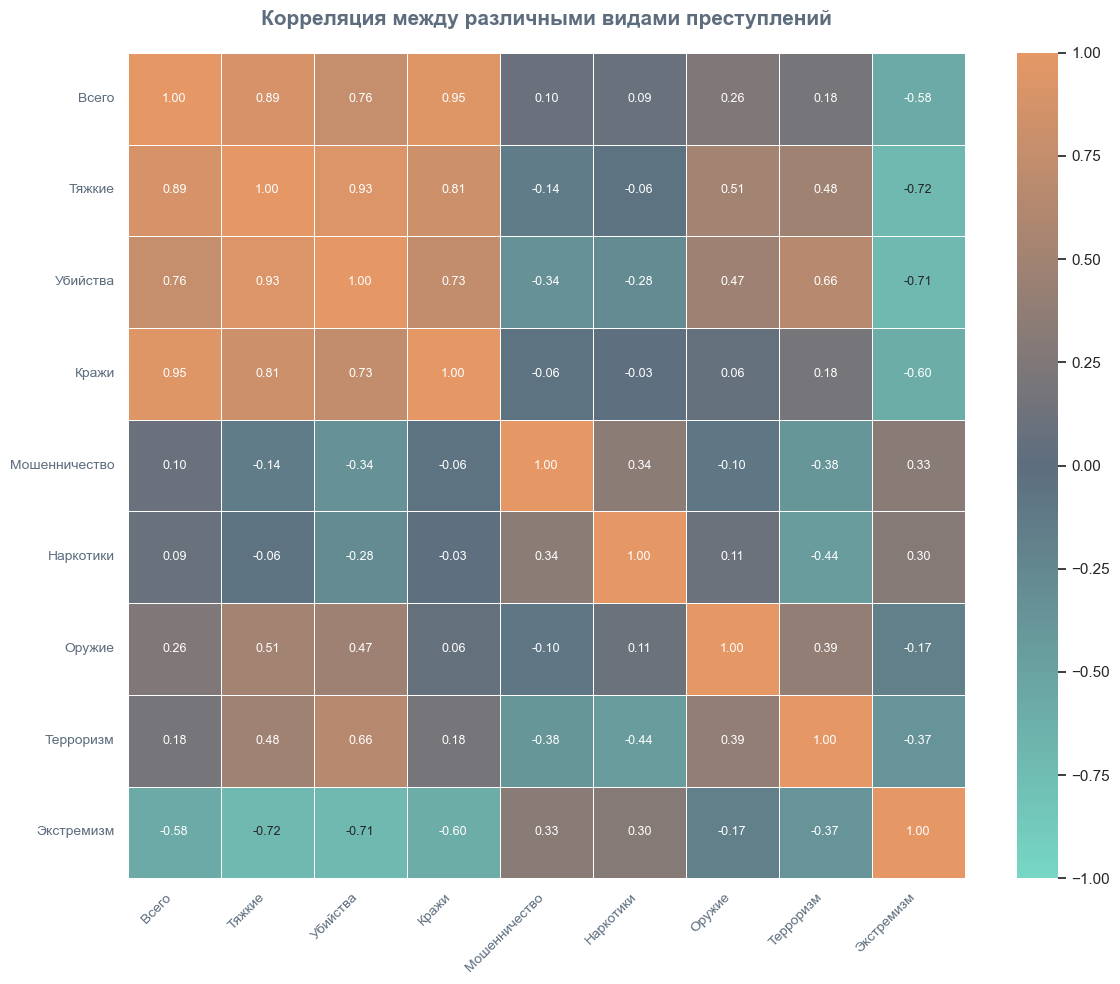

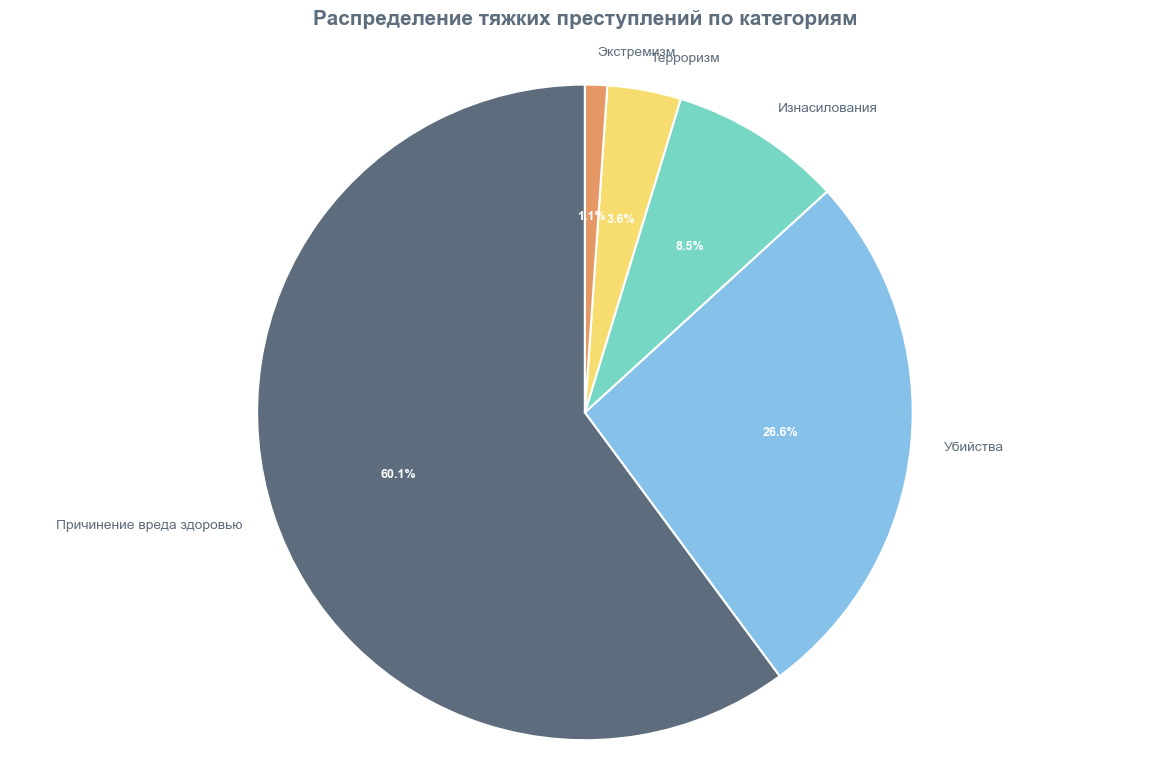

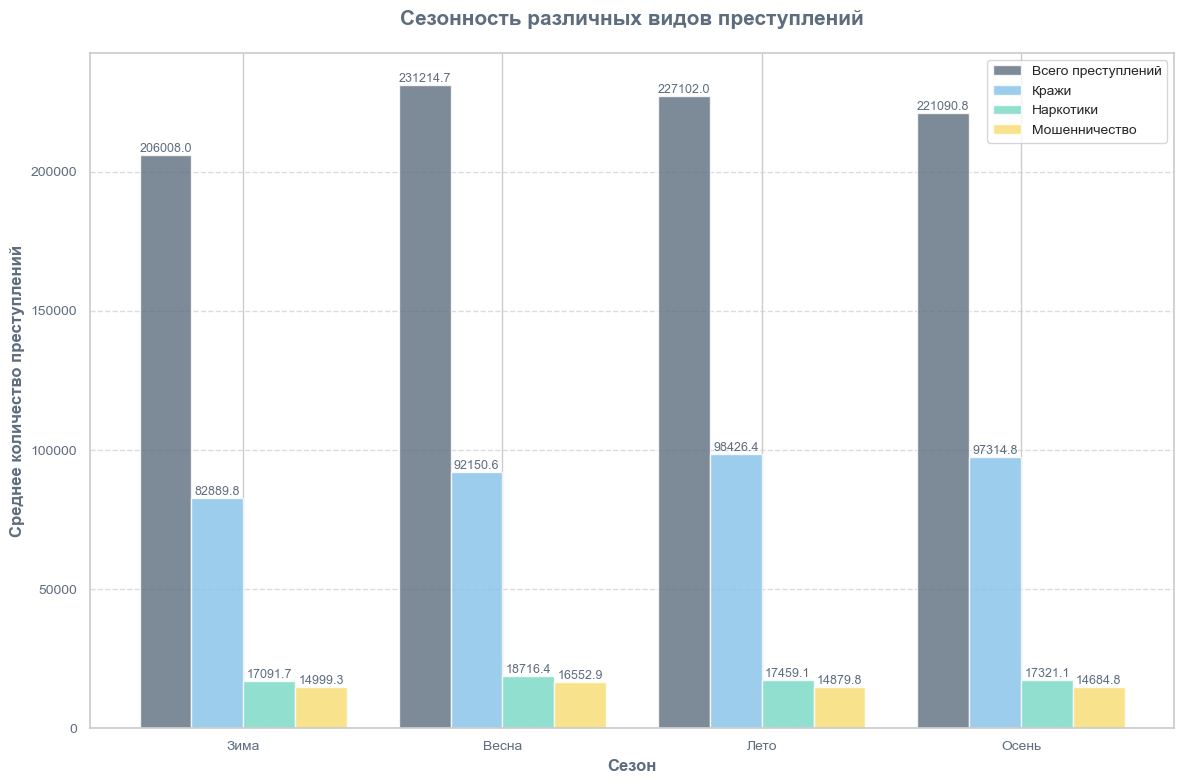

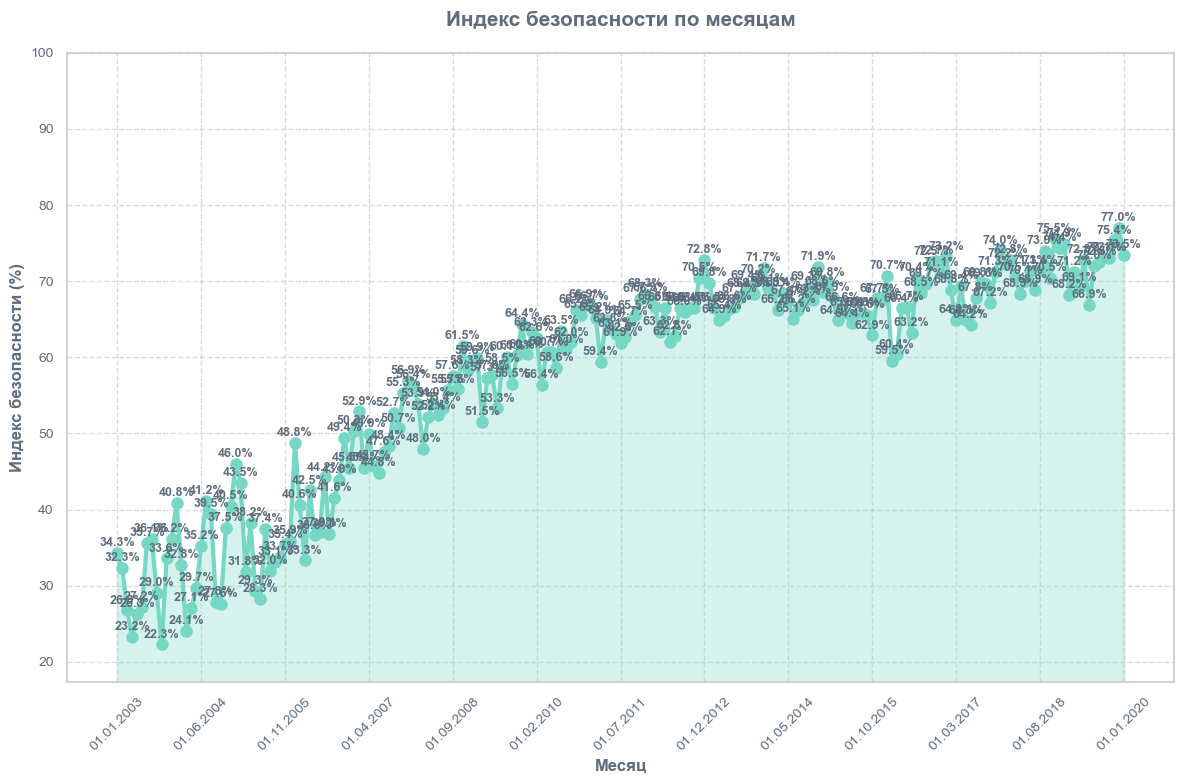

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
#from google.colab import files
import os



plt.style.use('ggplot')
sns.set(style="whitegrid")

colors = ["#5D6D7E", "#85C1E9", "#76D7C4", "#F7DC6F", "#E59866", "#BB8FCE"]
main_color = "#5D6D7E"
accent_color = "#76D7C4"
highlight_color = "#F7DC6F"

custom_cmap = LinearSegmentedColormap.from_list("crime_stats_cmap", ["#76D7C4", "#5D6D7E", "#E59866"])

try:
    df = pd.read_csv('crime.csv')
except FileNotFoundError:
    uploaded = files.upload()
    if 'crime.csv' in uploaded:
        df = pd.read_csv('crime.csv')

# 1. Визуализация динамики общей преступности и тяжких преступлений по месяцам
plt.figure(figsize=(12, 8))

plt.plot(df['month'], df['Total_crimes'], marker='o', linestyle='-', linewidth=2,
         color=colors[0], label='Общая преступность', markersize=6)

plt.plot(df['month'], df['Serious'], marker='s', linestyle='-', linewidth=2,
         color=colors[2], label='Тяжкие преступления', markersize=6)

plt.title('Динамика преступности по месяцам', fontsize=15, fontweight='bold', color=main_color, pad=20)
plt.xlabel('Месяц', fontsize=12, fontweight='bold', color=main_color)
plt.ylabel('Количество преступлений', fontsize=12, fontweight='bold', color=main_color)

plt.grid(True, linestyle='--', alpha=0.7)

plt.legend(fontsize=10, loc='upper right')

plt.xticks(rotation=45, fontsize=10, color=main_color)
plt.yticks(fontsize=10, color=main_color)

if len(df) > 12:
    step = len(df) // 12
    plt.xticks(df.index[::step], df['month'][::step], rotation=45)

plt.tight_layout()
plt.savefig('crime_dynamics.png', dpi=300, bbox_inches='tight')
plt.show()

# 2. Столбчатая диаграмма по типам преступлений
crime_categories = ['Murder', 'Rape', 'Theft', 'Vehicle_theft', 'Fraud_scam', 'Drugs', 'Weapons']
crime_categories_ru = ['Убийства', 'Изнасилования', 'Кражи', 'Угон ТС', 'Мошенничество', 'Наркотики', 'Оружие']

avg_crimes = df[crime_categories].mean().sort_values(ascending=False)
avg_crimes.index = [crime_categories_ru[crime_categories.index(cat)] for cat in avg_crimes.index]

plt.figure(figsize=(12, 8))
bars = plt.bar(avg_crimes.index, avg_crimes.values, color=colors, edgecolor='white', linewidth=1, alpha=0.8)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.1,
             f'{height:.1f}', ha='center', va='bottom',
             fontsize=10, color=main_color)

plt.title('Среднее количество преступлений по категориям', fontsize=15, fontweight='bold', color=main_color, pad=20)
plt.xlabel('Категория преступления', fontsize=12, fontweight='bold', color=main_color)
plt.ylabel('Среднее количество преступлений', fontsize=12, fontweight='bold', color=main_color)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=10, color=main_color, rotation=30)
plt.yticks(fontsize=10, color=main_color)

plt.tight_layout()
plt.savefig('crime_categories.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. Тепловая карта корреляций между различными видами преступлений
correlation_categories = ['Total_crimes', 'Serious', 'Murder', 'Theft', 'Fraud_scam', 'Drugs', 'Weapons', 'Terrorism', 'Extremism']
correlation_categories_ru = ['Всего', 'Тяжкие', 'Убийства', 'Кражи', 'Мошенничество', 'Наркотики', 'Оружие', 'Терроризм', 'Экстремизм']

rename_dict = {old: new for old, new in zip(correlation_categories, correlation_categories_ru)}

correlation_matrix = df[correlation_categories].corr()
correlation_matrix = correlation_matrix.rename(columns=rename_dict, index=rename_dict)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap=custom_cmap, vmin=-1, vmax=1,
            center=0, linewidths=0.5, annot_kws={"size": 9}, fmt=".2f")

plt.title('Корреляция между различными видами преступлений',
          fontsize=15, fontweight='bold', color=main_color, pad=20)

plt.xticks(fontsize=10, rotation=45, ha='right', color=main_color)
plt.yticks(fontsize=10, color=main_color)

plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# 4. Круговая диаграмма распределения тяжких преступлений
serious_categories = ['Murder', 'Rape', 'Harm_to_health', 'Terrorism', 'Extremism']
serious_categories_ru = ['Убийства', 'Изнасилования', 'Причинение вреда здоровью', 'Терроризм', 'Экстремизм']

serious_sums = df[serious_categories].sum()
serious_sums.index = serious_categories_ru

serious_percentage = serious_sums / serious_sums.sum() * 100

serious_percentage = serious_percentage.sort_values(ascending=False)

plt.figure(figsize=(12, 8))
wedges, texts, autotexts = plt.pie(serious_percentage,
                                  labels=serious_percentage.index,
                                  autopct='%1.1f%%',
                                  startangle=90,
                                  colors=colors,
                                  wedgeprops={'edgecolor': 'white', 'linewidth': 1.5},
                                  textprops={'fontsize': 10})

for text in texts:
    text.set_color(main_color)
    text.set_fontsize(10)

for autotext in autotexts:
    autotext.set_fontweight('bold')
    autotext.set_fontsize(9)
    autotext.set_color('white')

plt.title('Распределение тяжких преступлений по категориям',
          fontsize=15, fontweight='bold', color=main_color, pad=20)

plt.axis('equal')

plt.tight_layout()
plt.savefig('serious_crimes_pie.png', dpi=300, bbox_inches='tight')
plt.show()

# 5. Анализ сезонности преступлений
month_to_season = {
    'Январь': 'Зима', 'Февраль': 'Зима', 'Март': 'Весна',
    'Апрель': 'Весна', 'Май': 'Весна', 'Июнь': 'Лето',
    'Июль': 'Лето', 'Август': 'Лето', 'Сентябрь': 'Осень',
    'Октябрь': 'Осень', 'Ноябрь': 'Осень', 'Декабрь': 'Зима'
}

if df['month'].iloc[0] in month_to_season:
    df['Season'] = df['month'].map(month_to_season)
else:
    df['Month_num'] = df.index % 12 + 1
    season_map = {1: 'Зима', 2: 'Зима', 3: 'Весна', 4: 'Весна', 5: 'Весна', 6: 'Лето',
                 7: 'Лето', 8: 'Лето', 9: 'Осень', 10: 'Осень', 11: 'Осень', 12: 'Зима'}
    df['Season'] = df['Month_num'].map(season_map)

season_crimes = df.groupby('Season')[['Total_crimes', 'Theft', 'Drugs', 'Fraud_scam']].mean()

season_crimes.columns = ['Всего преступлений', 'Кражи', 'Наркотики', 'Мошенничество']

season_order = ['Зима', 'Весна', 'Лето', 'Осень']
season_crimes = season_crimes.reindex(season_order)

plt.figure(figsize=(12, 8))

x = np.arange(len(season_crimes.index))
width = 0.2

for i, col in enumerate(season_crimes.columns):
    plt.bar(x + (i - 1.5) * width, season_crimes[col], width,
            label=col, color=colors[i], alpha=0.8, edgecolor='white', linewidth=1)

    for j, value in enumerate(season_crimes[col]):
        plt.text(x[j] + (i - 1.5) * width, value + 1, f'{value:.1f}',
                 ha='center', va='bottom', fontsize=9, color=main_color)

plt.title('Сезонность различных видов преступлений',
          fontsize=15, fontweight='bold', color=main_color, pad=20)
plt.xlabel('Сезон', fontsize=12, fontweight='bold', color=main_color)
plt.ylabel('Среднее количество преступлений', fontsize=12, fontweight='bold', color=main_color)
plt.xticks(x, season_crimes.index, fontsize=10, color=main_color)
plt.yticks(fontsize=10, color=main_color)
plt.legend(fontsize=10, loc='best')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('seasonal_crimes.png', dpi=300, bbox_inches='tight')
plt.show()

# 6. Создание индекса безопасности и его визуализация по месяцам
safety_factors = ['Murder', 'Rape', 'Theft', 'Terrorism', 'Weapons']

df_normalized = df.copy()
for col in safety_factors:
    max_val = df[col].max()
    df_normalized[col] = 1 - (df[col] / max_val)

df_normalized['Safety_Index'] = df_normalized[safety_factors].mean(axis=1)
df_normalized['Safety_Percent'] = df_normalized['Safety_Index'] * 100

plt.figure(figsize=(12, 8))

plt.plot(df['month'], df_normalized['Safety_Percent'], marker='o', linestyle='-',
         linewidth=3, color=accent_color, markersize=8)

for i, (_, value) in enumerate(zip(df['month'], df_normalized['Safety_Percent'])):
    plt.text(i, value + 0.5, f'{value:.1f}%', ha='center', va='bottom',
             fontsize=9, color=main_color, fontweight='bold')

plt.fill_between(range(len(df)), df_normalized['Safety_Percent'],
                 alpha=0.3, color=accent_color)

plt.title('Индекс безопасности по месяцам',
          fontsize=15, fontweight='bold', color=main_color, pad=20)
plt.xlabel('Месяц', fontsize=12, fontweight='bold', color=main_color)
plt.ylabel('Индекс безопасности (%)', fontsize=12, fontweight='bold', color=main_color)
plt.xticks(range(len(df)), df['month'], rotation=45, fontsize=10, color=main_color)
plt.yticks(fontsize=10, color=main_color)
plt.grid(True, linestyle='--', alpha=0.7)

if len(df) > 12:
    step = len(df) // 12
    plt.xticks(range(0, len(df), step), df['month'][::step], rotation=45)

plt.ylim(df_normalized['Safety_Percent'].min() - 5, 100)

plt.tight_layout()
plt.savefig('safety_index.png', dpi=300, bbox_inches='tight')
plt.show()